<a href="https://colab.research.google.com/github/BFvandy/billboard-hot-or-not/blob/master/Fan_DA_Spotify_Project_Nov28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Billboard Music Classification
[Spotify and Youtube ](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

Billboard Data
https://github.com/azhadsyed/billboard-hot-or-not

[Hot or Not](https://towardsdatascience.com/hot-or-not-analyzing-60-years-of-billboard-hot-100-data-21e1a02cf304)

We can use the parsed dataset here and maybe match with our dataset:
https://github.com/azhadsyed/billboard-hot-or-not

[Hot or Not](https://towardsdatascience.com/hot-or-not-analyzing-60-years-of-billboard-hot-100-data-21e1a02cf304)


Ideas：
* Billboard 100, classification problem
* NLP, looking at title / lyrics

# Load Data

In [ ]:
# import Python packages
import pandas as pd
from pandas import DataFrame
import numpy as np
from google.colab import files
from sklearn import preprocessing
import matplotlib.pyplot as plt

import seaborn as sns
# regression package
import statsmodels.api as sm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Data Analytics/Data Analytics Team")
!pwd

Mounted at /content/drive
/content/drive/My Drive/Data Analytics/Data Analytics Team


In [ ]:
df = pd.read_csv('Spotify_Youtube.csv')
pd.set_option('display.max_columns', None)
df = df.drop(df.columns[0], axis=1)
df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https:

 Stream: number of streams of the song on Spotify.

 Stream is our dependent variable

In [ ]:
import pickle

with open('hot100-clean.pkl', 'rb') as f:
    hot100 = pickle.load(f)

hot100

,title,artist,rank,chart_name,chart_date,chart_date_64,main_artist,featured_artist
0,WAP,Cardi B Featuring Megan Thee Stallion,1,The Hot 100,2020-09-26,2020-09-26,"(Cardi B,)","(Megan Thee Stallion,)"
1,Dynamite,BTS,2,The Hot 100,2020-09-26,2020-09-26,"(BTS,)",NaN
2,Laugh Now Cry Later,Drake Featuring Lil Durk,3,The Hot 100,2020-09-26,2020-09-26,"(Drake,)","(Lil Durk,)"
3,Rockstar,DaBaby Featuring Roddy Ricch,4,The Hot 100,2020-09-26,2020-09-26,"(DaBaby,)","(Roddy Ricch,)"
4,Blinding Lights,The Weeknd,5,The Hot 100,2020-09-26,2020-09-26,"(The Weeknd,)",NaN
...,...,...,...,...,...,...,...,...
95,Over And Over,Thurston Harris,96,The Hot 100,1958-08-04,1958-08-04,"(Thurston Harris,)",NaN
96,I Believe In You,Robert & Johnny,97,The Hot 100,1958-08-04,1958-08-04,"(Robert, Johnny)",NaN
97,Little Serenade,The Ames Brothers,98,The Hot 100,1958-08-04,1958-08-04,"(The Ames Brothers,)",NaN
98,I'll Get By (As Long As I Have You),Billy Williams,99,The Hot 100,1958-08-04,1958-08-04,"(Billy Williams,)",NaN


This data has all the songs that have been in the hot 100 chart on billboard

In [ ]:
# Look at the artists that have been on the billboard the most times
hot100.groupby('artist').size().rename('count').reset_index().sort_values(by='count',ascending=False).head(10)

,artist,count
7943,Taylor Swift,975
2602,Elton John,889
5404,Madonna,857
4603,Kenny Chesney,744
2407,Drake,735
9125,Tim McGraw,726
4567,Keith Urban,673
7746,Stevie Wonder,659
7084,Rod Stewart,657
5464,Mariah Carey,615


In [ ]:
hot100[hot100['title'] == 'teachme']

,title,artist,rank,chart_name,chart_date,chart_date_64,main_artist,featured_artist
64,teachme,Musiq Soulchild,65,The Hot 100,2007-10-06,2007-10-06,"(Musiq Soulchild,)",NaN
65,teachme,Musiq Soulchild,66,The Hot 100,2007-09-29,2007-09-29,"(Musiq Soulchild,)",NaN
58,teachme,Musiq Soulchild,59,The Hot 100,2007-09-22,2007-09-22,"(Musiq Soulchild,)",NaN
56,teachme,Musiq Soulchild,57,The Hot 100,2007-09-15,2007-09-15,"(Musiq Soulchild,)",NaN
55,teachme,Musiq Soulchild,56,The Hot 100,2007-09-08,2007-09-08,"(Musiq Soulchild,)",NaN
50,teachme,Musiq Soulchild,51,The Hot 100,2007-09-01,2007-09-01,"(Musiq Soulchild,)",NaN
46,teachme,Musiq Soulchild,47,The Hot 100,2007-08-25,2007-08-25,"(Musiq Soulchild,)",NaN
41,teachme,Musiq Soulchild,42,The Hot 100,2007-08-18,2007-08-18,"(Musiq Soulchild,)",NaN
49,teachme,Musiq Soulchild,50,The Hot 100,2007-08-11,2007-08-11,"(Musiq Soulchild,)",NaN
51,teachme,Musiq Soulchild,52,The Hot 100,2007-08-04,2007-08-04,"(Musiq Soulchild,)",NaN


the same song by the same artist could be in the billboard for multiple days with multiple ranks, so we need to groupby title, artist and only keep one row

In [ ]:
hot100.groupby(['title','artist']).size()

title                                             artist                                 
"B" Girls                                         Young And Restless                         15
"Cherry Cherry" from Hot August Night             Neil Diamond                               10
"Having A Party" Medley                           The Ovations (Featuring Louis Williams)     9
"Joy" Pt. I                                       Isaac Hayes                                 9
"Roots" Medley                                    Quincy Jones                                7
                                                                                             ..
teachme                                           Musiq Soulchild                            20
whoa (mind in awe)                                XXXTENTACION                                3
whoknows                                          Musiq                                      13
www.memory                                    

In [ ]:
hot100_indicator = hot100.groupby(['title','artist']).size().rename('count').reset_index()
hot100_indicator

,title,artist,count
0,"""B"" Girls",Young And Restless,15
1,"""Cherry Cherry"" from Hot August Night",Neil Diamond,10
2,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),9
3,"""Joy"" Pt. I",Isaac Hayes,9
4,"""Roots"" Medley",Quincy Jones,7
...,...,...,...
28952,teachme,Musiq Soulchild,20
28953,whoa (mind in awe),XXXTENTACION,3
28954,whoknows,Musiq,13
28955,www.memory,Alan Jackson,15


# Preprocessing


## Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

Check missing data, need to drop null values

In [ ]:
# Drop missing data
df.dropna(inplace = True)
# drop duplicates
df.drop_duplicates(subset=None, keep='first')

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https:

In [ ]:
len(df) # 5% of missing values, it's ok to drop the rows

19170

## Merge Data

In [ ]:
df_classif = df.copy()

In [ ]:
merged_df = df_classif.merge(hot100_indicator, how='left',left_on=['Track', 'Artist'], right_on=['title','artist'])
merged_df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,NaN,NaN,NaN
19166,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,NaN,NaN,NaN
19167,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,NaN,NaN,NaN
19168,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY 

In [ ]:
merged_df[merged_df['count'].notnull()].shape
# this df contains all the songs that have made it to the hot 100 on billboard

(1772, 30)

## Create Target Variable

In [ ]:
merged_df['billboard'] = np.where(merged_df['count'].notnull(), 1,0)

In [ ]:
merged_df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count,billboard
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN,0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN,0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN,0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN,0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,NaN,NaN,NaN,0
19166,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,NaN,NaN,NaN,0
19167,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,NaN,NaN,NaN,0
19168,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYL

# EDA

## Distribution and Correlations

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Views'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Stream'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'billboard'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

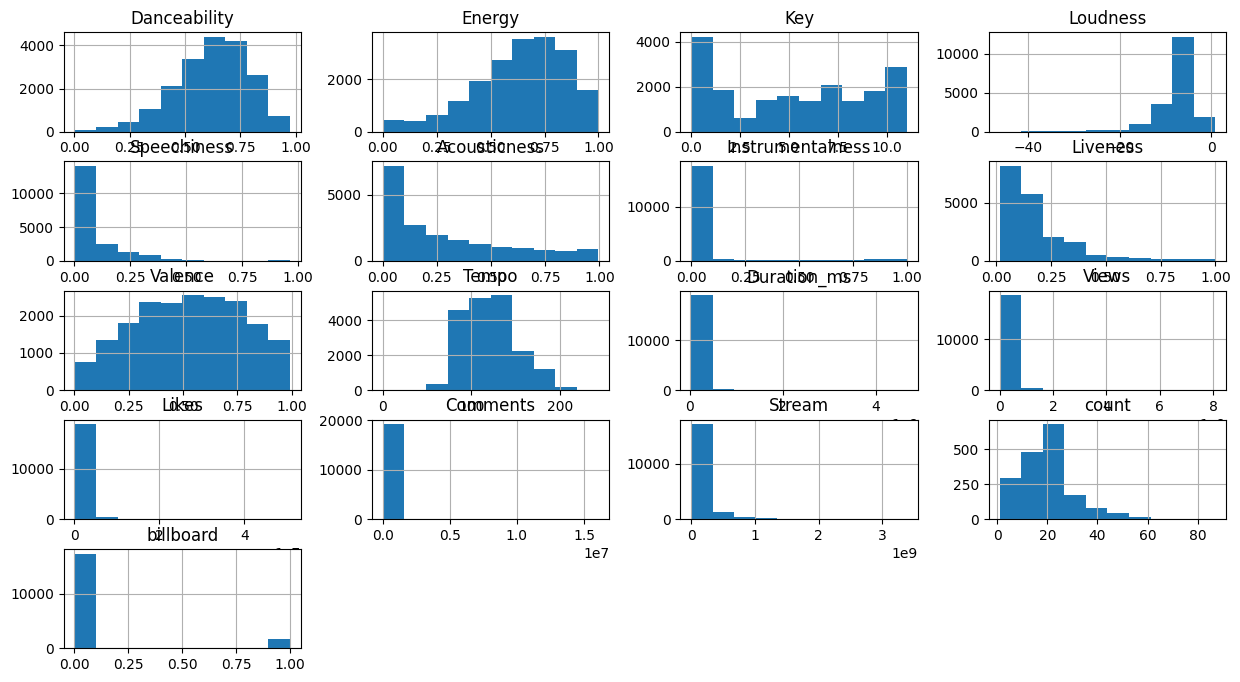

In [ ]:
merged_df.hist(figsize = (15,8)) # look at distributions of the the data

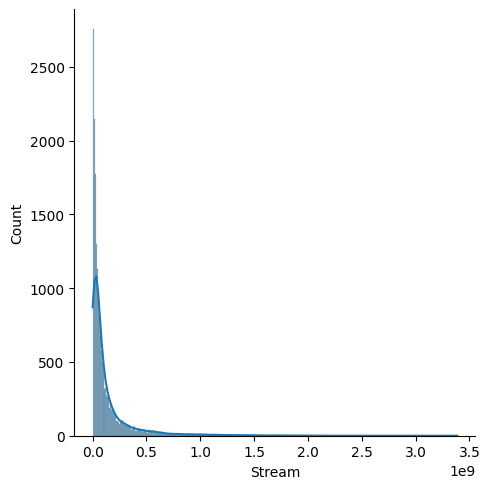

In [ ]:
sns.displot(data=merged_df, x="Stream", kde=True)
# sns.displot(data=df[df["Stream"] <= 0.5*10**9], x="Stream", kde=True)

In [ ]:
# check correlations
merged_df.corr()

<ipython-input-20-fce5c75d7f21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Danceability,1.000000,0.237308,0.040010,0.358489,0.227250,-0.280314,-0.322392,-0.081334,0.464737,-0.063116,-0.090393,0.089105,0.099296,0.043748,0.072299,0.087217,-0.028580
Energy,0.237308,1.000000,0.032441,0.745109,0.091493,-0.661459,-0.316586,0.174765,0.391466,0.156221,0.022895,0.066530,0.061980,0.045151,0.044376,0.008983,0.034082
Key,0.040010,0.032441,1.000000,0.028907,0.022568,-0.031197,-0.000131,-0.007418,0.044923,0.000744,0.003057,0.009293,0.007948,0.007949,-0.006250,0.006285,-0.008933
Loudness,0.358489,0.745109,0.028907,1.000000,0.070431,-0.552748,-0.557273,0.086952,0.316783,0.143877,0.010756,0.118406,0.123731,0.059282,0.118746,0.121104,0.019265
Speechiness,0.227250,0.091493,0.022568,0.070431,1.000000,-0.099049,-0.112720,0.065696,0.061185,0.051544,-0.049266,-0.008672,0.014429,0.010993,-0.015688,-0.066231,-0.079617
Acousticness,-0.280314,-0.661459,-0.031197,-0.552748,-0.099049,1.000000,0.283356,-0.053317,-0.205586,-0.129236,-0.023606,-0.069905,-0.078123,-0.052988,-0.104716,-0.101061,-0.081323
Instrumentalness,-0.322392,-0.316586,-0.000131,-0.557273,-0.112720,0.283356,1.000000,-0.057004,-0.269038,-0.081878,-0.006245,-0.080820,-0.081171,-0.032473,-0.092336,-0.092856,-0.064229
Liveness,-0.081334,0.174765,-0.007418,0.086952,0.065696,-0.053317,-0.057004,1.000000,0.033008,0.008357,-0.000594,-0.017140,-0.023562,-0.013107,-0.037141,-0.047327,-0.026999
Valence,0.464737,0.391466,0.044923,0.316783,0.061185,-0.205586,-0.269038,0.033008,1.000000,0.091131,-0.050988,0.038699,0.013986,0.018601,-0.011480,-0.037564,0.025883
Tempo,-0.063116,0.156221,0.000744,0.143877,0.051544,-0.129236,-0.081878,0.008357,0.091131,1.000000,-0.014836,-0.001373,0.002287,0.008085,0.002584,-0.041880,0.003297


<ipython-input-21-4aa3746ddb66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue


<Axes: >

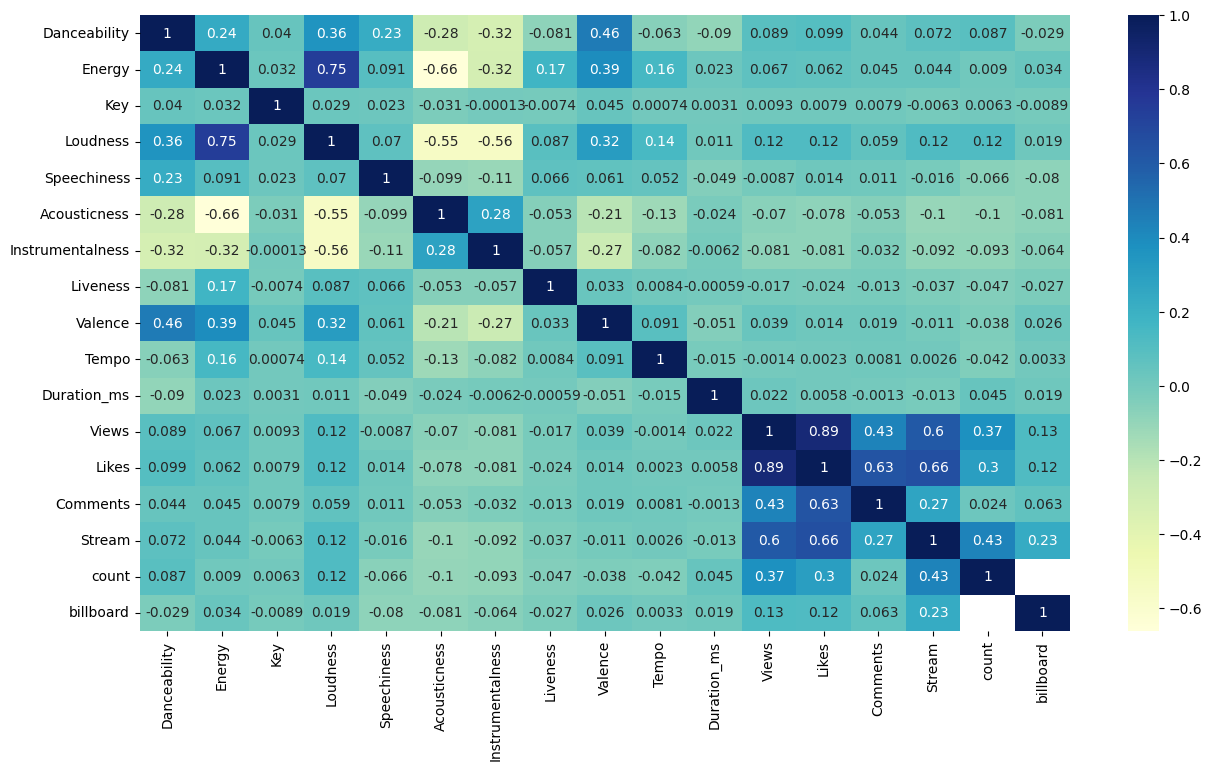

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(merged_df.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue

Note that Stream is has relatively high corelation with billboard

Likes,Views and Comments are highly correlated, so we should work around that by creating features like like/view ratios and comment/view ratios.

Youtube Likes, views, and comments are very correlated with the dependent variable.

<Axes: >

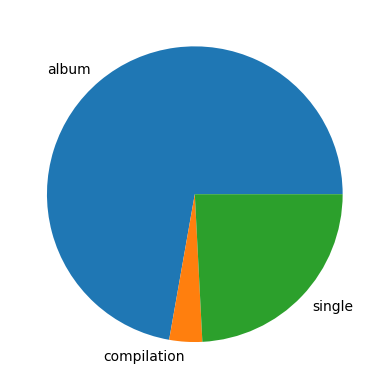

In [ ]:
merged_df.groupby('Album_type').size().plot.pie()

## Top 10 artists with highest views on Youtube

In [ ]:
top_artists = merged_df.groupby('Artist').mean().sort_values(by='Views',ascending=False).head(10)
top_artists

<ipython-input-23-ada7f8036bf5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_artists = merged_df.groupby('Artist').mean().sort_values(by='Views',ascending=False).head(10)


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Artist,,,,,,,,,,,,,,,,,
Ed Sheeran,0.713600,0.608900,4.700000,-5.526400,0.057440,0.308300,0.000065,0.172810,0.566000,105.693000,225800.200000,1.546021e+09,8.354332e+06,252082.200000,1.439488e+09,29.666667,0.300000
CoComelon,0.731700,0.400200,3.800000,-10.833400,0.042910,0.529600,0.000017,0.117090,0.823800,158.861900,146435.600000,1.460167e+09,4.171391e+06,0.000000,3.690822e+07,NaN,0.000000
Katy Perry,0.681800,0.765500,5.300000,-4.586000,0.052100,0.041185,0.000004,0.253630,0.601400,122.605600,215887.000000,1.312063e+09,6.306709e+06,315326.700000,6.607329e+08,28.400000,0.500000
Justin Bieber,0.651000,0.625000,3.444444,-6.516111,0.068267,0.321678,0.000161,0.221611,0.566444,126.150889,186853.555556,1.221199e+09,8.731025e+06,806551.888889,1.124656e+09,27.666667,0.333333
Charlie Puth,0.743400,0.565000,4.200000,-6.187700,0.085330,0.381210,0.008600,0.110100,0.610900,109.925400,193943.400000,1.216759e+09,8.633692e+06,372379.600000,7.041187e+08,30.000000,0.300000
Daddy Yankee,0.780111,0.811444,3.888889,-4.819778,0.072933,0.124800,0.000022,0.136122,0.671667,104.340556,203115.444444,1.207587e+09,7.276161e+06,518939.222222,5.486072e+08,20.000000,0.111111
Luis Fonsi,0.644600,0.741700,4.000000,-5.148200,0.077950,0.314690,0.000042,0.183040,0.644800,128.149900,214262.300000,1.162811e+09,6.690849e+06,470342.800000,5.054326e+08,9.000000,0.100000
Bruno Mars,0.715000,0.629556,2.888889,-6.275667,0.046933,0.163156,0.000008,0.175700,0.657667,113.713889,215656.111111,1.136871e+09,6.609977e+06,213325.111111,1.107037e+09,37.400000,0.555556
Macklemore & Ryan Lewis,0.653800,0.669900,4.900000,-6.233000,0.158990,0.223420,0.000015,0.213970,0.508330,102.145100,279002.900000,1.012206e+09,6.604141e+06,242519.000000,3.982978e+08,NaN,0.000000


## Top 10 songs with highest stream on Spotify

In [ ]:
top_songs = merged_df.groupby('Track').mean().sort_values(by='Stream',ascending=False).head(10)
top_songs

<ipython-input-24-1e56b50cf299>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_songs = merged_df.groupby('Track').mean().sort_values(by='Stream',ascending=False).head(10)


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Track,,,,,,,,,,,,,,,,,
Blinding Lights,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,6.741645e+08,8817927.0,282589.0,3.386520e+09,42.0,1.0
Shape of You,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,5.908398e+09,31047780.0,1130327.0,3.362005e+09,NaN,0.0
Someone You Loved,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,5.867684e+08,7367091.0,147565.0,2.634013e+09,54.0,1.0
rockstar (feat. 21 Savage),0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147.0,1.060220e+09,12564657.0,366520.0,2.594927e+09,NaN,0.0
Sunflower - Spider-Man: Into the Spider-Verse,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,1.977389e+09,13749809.5,331063.5,2.538330e+09,NaN,0.0
One Dance,0.792,0.625,1.0,-5.609,0.0536,0.00776,0.001800,0.3290,0.370,103.967,173987.0,1.692883e+08,1662640.0,13775.0,2.522432e+09,NaN,0.0
STAY (with Justin Bieber),0.591,0.764,1.0,-5.484,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806.0,6.812085e+08,10131410.5,247007.0,2.365778e+09,NaN,0.0
Señorita,0.759,0.548,9.0,-6.049,0.0290,0.03920,0.000000,0.0828,0.749,116.967,190800.0,1.487650e+09,19846118.0,640320.0,2.336220e+09,NaN,0.0
Heat Waves,0.761,0.525,11.0,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805.0,4.800890e+08,7145914.0,140345.0,2.261464e+09,NaN,0.0


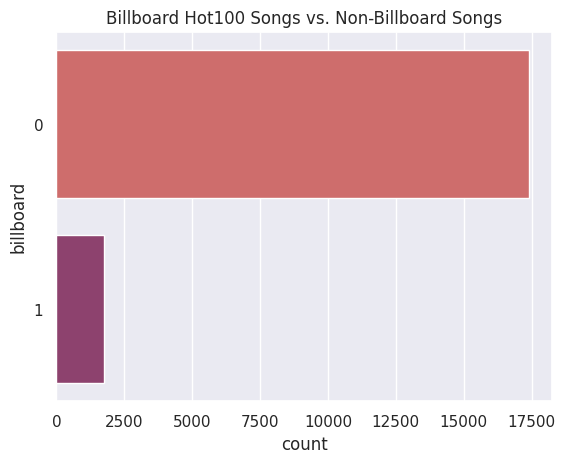

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="billboard", data=merged_df, palette="flare").set(title='Billboard Hot100 Songs vs. Non-Billboard Songs')
plt.show()

In [ ]:
unique, counts = np.unique(merged_df['billboard'], return_counts=True)
print("about {} % of the songs in the original df were in the billboard".format(round(100* counts[1] / (counts[0] + counts[1]),2)))

about 9.24 % of the songs in the original df were in the billboard


# Feature Engineering and Selection

In [ ]:
merged_df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count,billboard,like_view_ratio,cmt_view_ratio
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN,0,0.008970,0.000245
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN,0,0.014985,0.000431
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN,0,0.033449,0.000877
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN,0,0.008446,0.000261
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0,1,0.010020,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,NaN,NaN,NaN,0,0.015528,0.000000
19166,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,NaN,NaN,NaN,0,0.012256,0.000000
19167,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,356

In [ ]:
# Like/view Ratio and Comment/view ratio

merged_df['like_view_ratio'] = merged_df['Likes'] / merged_df['Views']
merged_df['cmt_view_ratio'] = merged_df['Comments'] / merged_df['Views']

In [ ]:
merged_df_classif = merged_df.iloc[:,6:17].join(merged_df.iloc[:,20:23]).join(merged_df.iloc[:,[-7,-3,-2,-1]])
merged_df_classif
# this is the df I will use for classification

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,billboard,like_view_ratio,cmt_view_ratio
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09,0,0.008970,0.000245
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08,0,0.014985,0.000431
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,0,0.033449,0.000877
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08,0,0.008446,0.000261
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08,1,0.010020,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06,0,0.015528,0.000000
19166,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07,0,0.012256,0.000000
19167,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06,0,0.009230,0.000000
19168,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06,0,0.013470,0.000000


<Axes: >

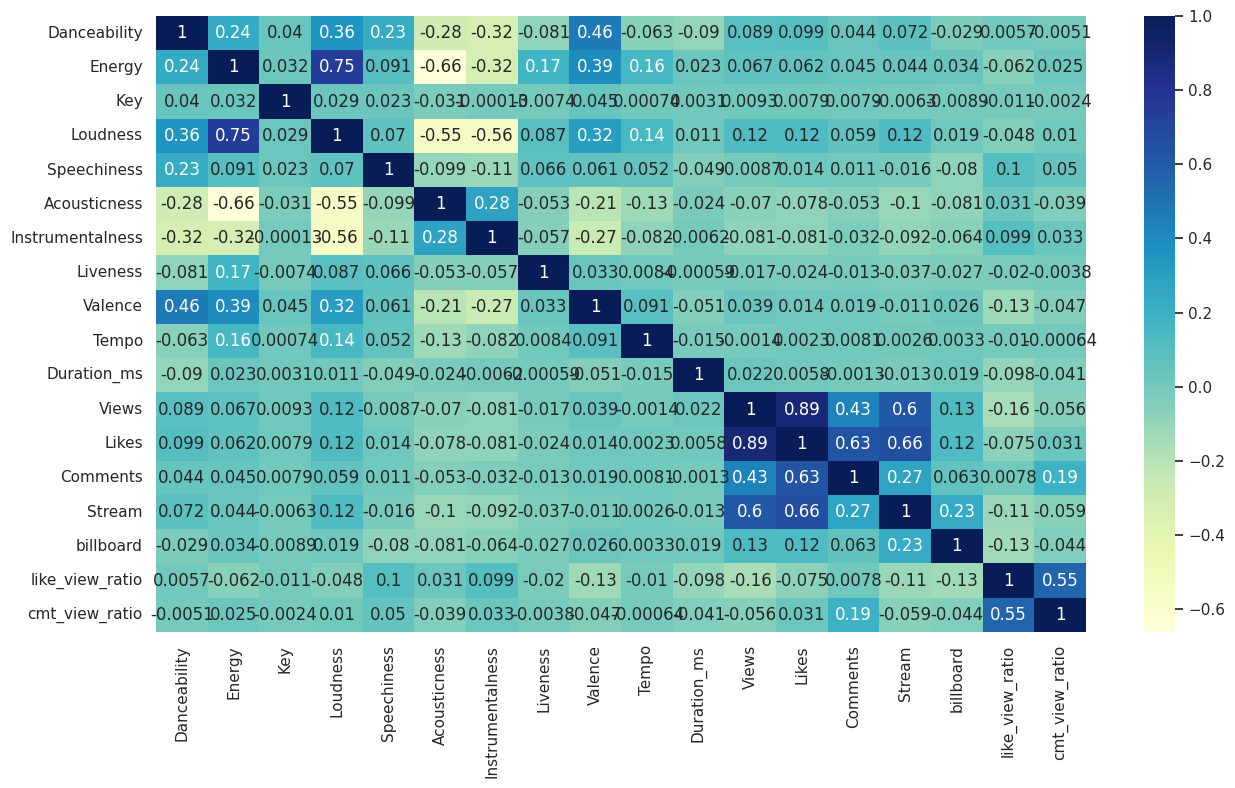

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(merged_df_classif.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue

## Deal with data unbalanced

by undersampling the data

In [ ]:
# shuffle the data before creating the subsamples

merged_df_classif = merged_df_classif.sample(frac=1)

class_1 = merged_df_classif.loc[merged_df_classif['billboard'] == 1]
class_count_0, class_count_1 = merged_df_classif['billboard'].value_counts()
print("Number of songs not in billboard: {} \nNumber of songs in Billboard {}".format(class_count_0, class_count_1))

Number of songs not in billboard: 17398 
Number of songs in Billboard 1772


In [ ]:
class_0 = merged_df_classif.loc[merged_df_classif['billboard'] == 0]
class_0_under = class_0.sample(class_count_1) # randmomly sampled
undersampled_df = pd.concat([class_0_under, class_1], axis=0).sample(frac = 1, random_state = 0)
undersampled_df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,billboard,like_view_ratio,cmt_view_ratio
2785,0.542,0.627,0.0,-7.105,0.0243,0.07940,0.000517,0.2770,0.814,89.734,305213.0,17802250.0,146470.0,7280.0,46040294.0,0,0.008228,0.000409
5163,0.646,0.809,1.0,-3.990,0.0282,0.08540,0.000000,0.0806,0.588,139.200,229467.0,42217957.0,239130.0,10206.0,65611091.0,1,0.005664,0.000242
16283,0.623,0.656,9.0,-3.662,0.2290,0.28800,0.000000,0.1050,0.576,112.823,302118.0,299133335.0,2651893.0,44212.0,130793069.0,0,0.008865,0.000148
5623,0.688,0.554,5.0,-11.218,0.0428,0.17500,0.085400,0.0978,0.615,115.515,260653.0,156227.0,1993.0,171.0,4851243.0,0,0.012757,0.001095
14597,0.582,0.822,0.0,-4.861,0.0365,0.00749,0.000002,0.8180,0.471,100.025,261373.0,20611626.0,159771.0,5694.0,119628785.0,1,0.007751,0.000276


## Logistic Regression Classifier

Now I just focus on the features of the songs itself (11 features) plus the 2 engineered features

In [ ]:
# feature list
merged_df.iloc[:,6:17].join(merged_df.iloc[:,-2:])

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,like_view_ratio,cmt_view_ratio
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,0.008970,0.000245
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,0.014985,0.000431
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,0.033449,0.000877
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,0.008446,0.000261
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,0.010020,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,0.015528,0.000000
19166,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,0.012256,0.000000
19167,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,0.009230,0.000000
19168,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,0.013470,0.000000


In [ ]:
undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,-2:])

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,like_view_ratio,cmt_view_ratio
16084,0.727,0.626,7.0,-8.415,0.0726,0.0469,0.000026,0.1260,0.3220,86.970,191406.0,0.009102,0.000162
616,0.564,0.774,1.0,-9.424,0.0368,0.0135,0.001910,0.0861,0.6570,100.894,277477.0,0.005258,0.000134
10755,0.545,0.959,7.0,-2.346,0.1740,0.3630,0.915000,0.1820,0.5270,92.096,113074.0,0.039050,0.003090
10204,0.252,0.800,0.0,-4.845,0.0368,0.1200,0.053800,0.1180,0.2900,139.361,335333.0,0.012700,0.000457
2820,0.711,0.292,4.0,-15.523,0.0370,0.3130,0.000000,0.1310,0.1940,103.951,296800.0,0.008839,0.000260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,0.543,0.284,6.0,-16.400,0.2190,0.3600,0.365000,0.1100,0.0786,151.344,160366.0,0.041464,0.002475
4829,0.703,0.700,5.0,-6.789,0.0693,0.3020,0.471000,0.0718,0.5820,97.675,265107.0,0.011894,0.000401
12075,0.584,0.845,1.0,-3.029,0.0660,0.0858,0.000000,0.1240,0.3930,141.018,227021.0,0.009378,0.000385
1440,0.666,0.855,9.0,-5.051,0.0295,0.1790,0.000001,0.0987,0.8030,125.639,268427.0,0.003924,0.000087


### without undersampling

Test Accuracy Score is 0.912
Test f1_score Score is 0.0
Test roc_auc_score Score is 0.5
      0  1
0  3495  0
1   339  0


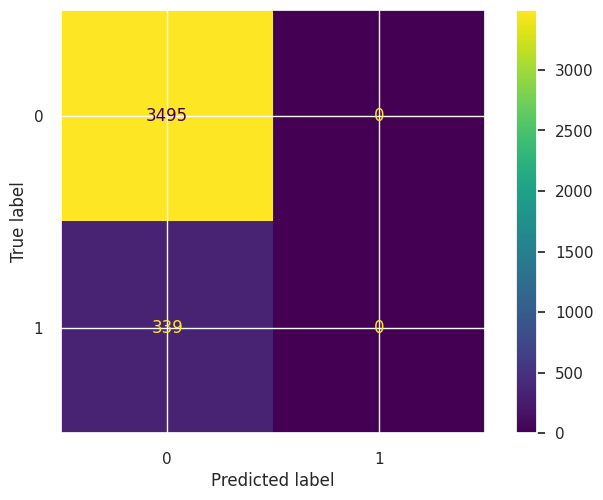

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

# split independent variables and dependent variables
x=merged_df.iloc[:,6:17].join(merged_df.iloc[:,-2:])
y=merged_df['billboard']
x

#Train test spilt
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Modeling
model1 = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)

# Evaluate Model
print('Test Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_predict)))
print('Test f1_score Score is {:.3}'.format(f1_score(y_test, y_predict)))
print('Test roc_auc_score Score is {:.3}'.format(roc_auc_score(y_test, y_predict)))

# Look at Confusion Matrix
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
cm_logistic = confusion_matrix(y_test, y_predict, labels=model1.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,display_labels=model1.classes_)
disp.plot()
plt.show()

### with undersampling

Test Accuracy Score is 0.484
Test f1_score Score is 0.652
Test roc_auc_score Score is 0.5
   0    1
0  0  366
1  0  343


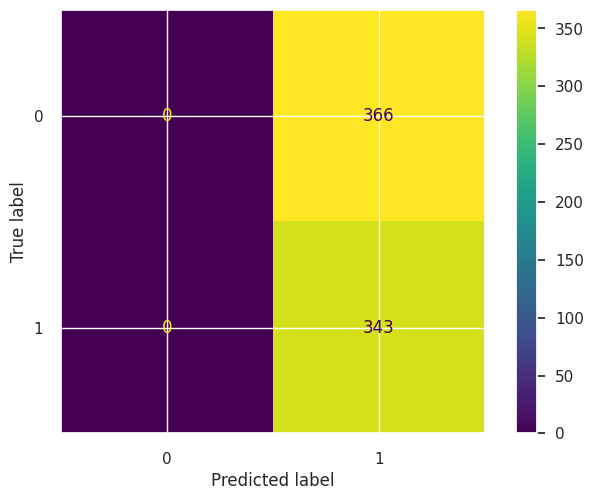

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#Train test spilt
x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,-2:])
y=undersampled_df['billboard']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Modeling
model2 = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model2.fit(x_train, y_train)
y_predict = model2.predict(x_test)

# Evaluate Model
print('Test Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_predict)))
print('Test f1_score Score is {:.3}'.format(f1_score(y_test, y_predict)))
print('Test roc_auc_score Score is {:.3}'.format(roc_auc_score(y_test, y_predict)))

# Confusion Matrix
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

cm_logistic_us = confusion_matrix(y_test, y_predict, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model2.classes_)
disp.plot()
plt.show()

## Decision Tree

In [ ]:
undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,[-4,-2,-1]]) # with stream

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,like_view_ratio,cmt_view_ratio
2785,0.542,0.627,0.0,-7.105,0.0243,0.07940,0.000517,0.2770,0.814,89.734,305213.0,46040294.0,0.008228,0.000409
5163,0.646,0.809,1.0,-3.990,0.0282,0.08540,0.000000,0.0806,0.588,139.200,229467.0,65611091.0,0.005664,0.000242
16283,0.623,0.656,9.0,-3.662,0.2290,0.28800,0.000000,0.1050,0.576,112.823,302118.0,130793069.0,0.008865,0.000148
5623,0.688,0.554,5.0,-11.218,0.0428,0.17500,0.085400,0.0978,0.615,115.515,260653.0,4851243.0,0.012757,0.001095
14597,0.582,0.822,0.0,-4.861,0.0365,0.00749,0.000002,0.8180,0.471,100.025,261373.0,119628785.0,0.007751,0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14667,0.578,0.386,6.0,-11.464,0.0278,0.20800,0.045300,0.3070,0.569,154.902,234093.0,121193351.0,0.041667,0.000921
10875,0.706,0.800,5.0,-6.333,0.0399,0.00584,0.000000,0.0822,0.629,100.011,259333.0,482619005.0,0.006392,0.000279
9347,0.594,0.866,5.0,-4.270,0.0352,0.00112,0.000009,0.0681,0.760,132.944,222920.0,31495079.0,0.002210,0.000047
18036,0.759,0.730,0.0,-7.985,0.0516,0.14500,0.000003,0.1100,0.740,115.007,268434.0,850495951.0,0.008526,0.000467


In [ ]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

#Train test spilt
x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,[-4,-2,-1]])
y=undersampled_df['billboard']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Create Decision Tree (Empty Object)
Music_Tree=DecisionTreeClassifier(criterion="entropy", max_depth = 5)

#Train the decision tree
Music_Tree.fit(x_train,y_train)

y_pred = Music_Tree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
Music_TreeAcc=accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(Music_TreeAcc*100))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       366
           1       0.69      0.79      0.73       343

    accuracy                           0.72       709
   macro avg       0.73      0.73      0.72       709
weighted avg       0.73      0.72      0.72       709

Decision Tree accuracy is: 72.36%


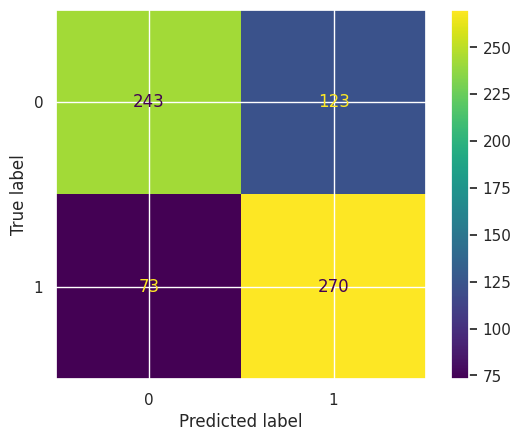

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


cm_tree = confusion_matrix(y_test, y_pred, labels=Music_Tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=Music_Tree.classes_)
disp.plot()
plt.show()

In [ ]:
# use decision tree to get feature importance
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=Music_Tree.feature_importances_,
            y=x_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(template='plotly_dark', title='<b>Estimating feature importance through the Decision Tree model', title_x=0.5,
                 xaxis_title="Feature importance", yaxis_title='Feature')

fig.show()

decision tree without stream

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# Music_TreeAcc=accuracy_score(y_pred,y_test)
# print('Decision Tree accuracy is: {:.2f}%'.format(Music_TreeAcc*100))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       366
           1       0.63      0.72      0.67       343

    accuracy                           0.66       709
   macro avg       0.67      0.66      0.66       709
weighted avg       0.67      0.66      0.66       709

Decision Tree accuracy is: 66.29%


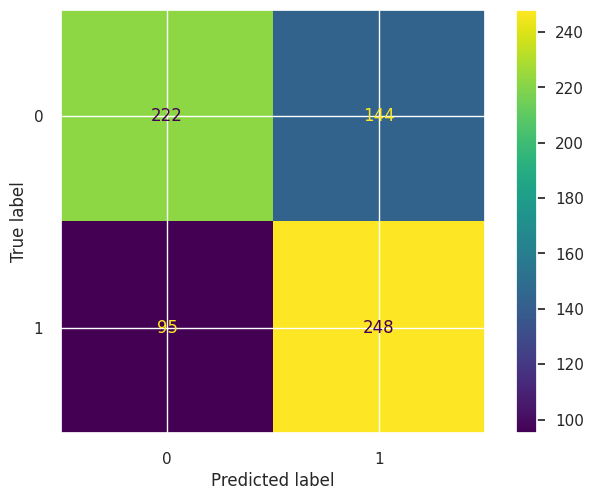

In [ ]:
# cm_tree = confusion_matrix(y_test, y_pred, labels=Music_Tree.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=Music_Tree.classes_)
# disp.plot()
# plt.show()

The constructed tree has  53 nodes


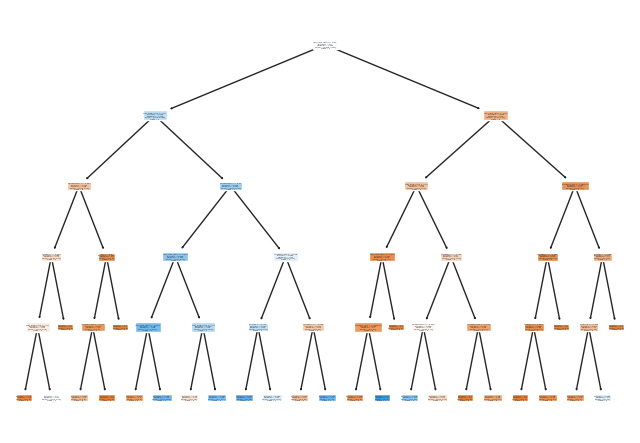

In [ ]:
# Visualize Decision Tree:

from sklearn import tree
#First we will visualize the number of nodes
n_nodes=Music_Tree.tree_.node_count
print("The constructed tree has ", n_nodes, "nodes")

#Now we will visualize the tree in text mode
g_tree=tree.export_text(Music_Tree, feature_names=list(x.columns), show_weights=True)
tree.plot_tree(Music_Tree, class_names=['0','1'], filled=True, feature_names=list(x.columns))
plt.show()

## Random Forest Classifier

### without undersampling

test accuracy score = 0.9115805946791862
test f1_score = 0.0
test roc_auc_score = 0.5


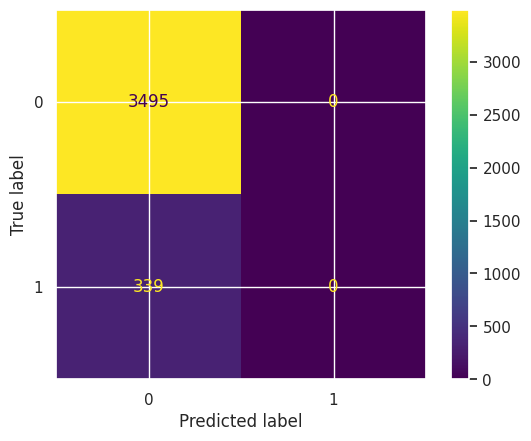

In [ ]:
# Load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

#Train test spilt
x=merged_df.iloc[:,6:17].join(merged_df.iloc[:,-2:])
# x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,[-4,-2,-1]]) This would be adding in Stream
y=merged_df['billboard']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Modeling
model3=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1,max_leaf_nodes=8)
model3.fit(x_train,y_train)

# Calculate test accuracy
y_test_pred=model3.predict(x_test)
print(f'test accuracy score = {accuracy_score(y_test,y_test_pred)}')
print(f'test f1_score = {f1_score(y_test,y_test_pred)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_test_pred)}')

cm_rf = confusion_matrix(y_test, y_test_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=model3.classes_)
disp.plot()
plt.show()

### with undersampling

test accuracy score = 0.691114245416079
test f1_score = 0.6970954356846473
test roc_auc_score = 0.6924835507973682


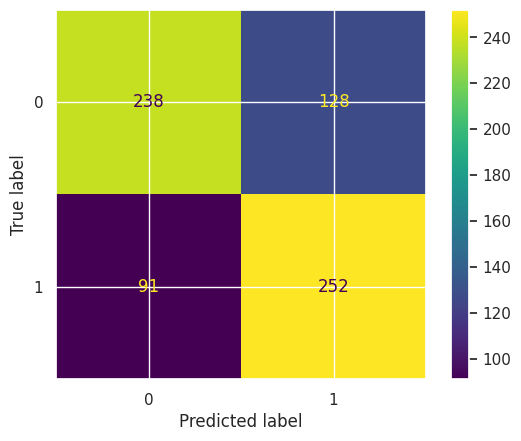

In [ ]:
# Modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split

#Train test spilt
x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,-2:])
# x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,[-4,-2,-1]]) This would be adding in Stream
y=undersampled_df['billboard']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Modeling
model4=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1,max_leaf_nodes=8)
model4.fit(x_train,y_train)

# Calculate test accuracy
y_test_pred=model4.predict(x_test)
print(f'test accuracy score = {accuracy_score(y_test,y_test_pred)}')
print(f'test f1_score = {f1_score(y_test,y_test_pred)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_test_pred)}')

cm_rf_under = confusion_matrix(y_test, y_test_pred, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_under,display_labels=model4.classes_)
disp.plot()
plt.show()

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyper parameter tuning

# model4=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1,max_leaf_nodes=8)
param_grid={'n_estimators': [100, 200],
            'max_features': [2,4,6],
            'max_depth': [4,8],
            'criterion':['gini'],
            'min_samples_split': [4,6,8]}

rf_cv = RandomForestClassifier()

# use this to try different parameters, will get the best regressor, optimal model
grid_search = GridSearchCV(rf_cv,
                           param_grid,
                           cv = 5, # cross validation
                           return_train_score = True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 8],
                         'max_features': [2, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [61]:
print('Best hyperparameters are: '+str(grid_search.best_params_))
print('Best score is: '+str(grid_search.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 100}
Best score is: 0.9065597356559651


In [62]:
rfc1=RandomForestClassifier(random_state=42, max_features=2, n_estimators= 100, max_depth=4, min_samples_split =4, criterion='gini')

In [63]:
rfc1.fit(x_train, y_train)
y_test_pred=rfc1.predict(x_test)

print(f'test accuracy score = {accuracy_score(y_test,y_test_pred)}')
print(f'test f1_score = {f1_score(y_test,y_test_pred)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_test_pred)}')

test accuracy score = 0.9115805946791862
test f1_score = 0.0
test roc_auc_score = 0.5


but high accuracy doesn't make sense

## Neural Network

In TensorFlow there are fixed stages for creating a model:

Creating a model – piece together the layers of a Neural Network using the Functional or Sequential API
Compiling a model – defining how a model’s performance should be measured, and how it should improve (loss function and optimizer)
Fitting a model – letting a model find patterns in the data

In [64]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split

#Train test spilt
x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,-2:])
# x=undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,[-4,-2,-1]]) This would be adding in Stream
y=undersampled_df['billboard']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#we use Binary as loss function,because we are working with 2 classes
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
                metrics = ['accuracy'])
model_1.fit(x, y, epochs = 5)

model_1.fit(x, y, epochs = 200, verbose = 0)
#we set verbose = 0 to remove training procedure )
model_1.evaluate(x, y)

Epoch 1/5
111/111 [==============================] - 1s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 2/5
111/111 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
111/111 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
111/111 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
111/111 [==============================] - 1s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246209144592285, 0.5]

In [ ]:
# # Let’s try to add more neurons and try Adam optimizer

# tf.random.set_seed(42)
# model_3 = tf.keras.Sequential([

#   tf.keras.layers.Dense(100), # add 100 dense neurons

#   tf.keras.layers.Dense(10), # add another layer with 10 neurons

#   tf.keras.layers.Dense(1)

# ])

# model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),

#                 optimizer=tf.keras.optimizers.Adam(),

#                 metrics=['accuracy'])

# model_3.fit(x, y, epochs=100, verbose=0)
# model_3.evaluate(x,y)